# Visualize

<br/>

----

<br/>

In [1]:
import os
import json
import numpy as np
from matplotlib import gridspec
import matplotlib.pyplot as plt

BONES = [
    [0, 1],
    [13, 14],
    [0, 2],
    [1, 3],
    [2, 4],
    [3, 5],
    [7, 8],
    [7, 9],
    [8, 10],
    [9, 11],
    [10, 12],
    [14, 6]
]


def _draw_bones(ax, kps, color, bones_def=BONES, alpha=0.9, linewidth=2., linestyle="solid"):

    for bone in bones_def:
        i_from, i_to = bone

        points = kps[[i_from, i_to]]
        ax.plot3D(points[:, 0], points[:, 1], points[:, 2], color=color, alpha=alpha, linewidth=linewidth, linestyle=linestyle)


def add_plot_kps(seq_list):
    midhip = ((seq_list[:, :, :, 0] + seq_list[:, :, :, 1]) / 2).reshape(*seq_list.shape[:3], 1, 3)
    seq_list = np.concatenate((seq_list, midhip), axis=-2)

    neck = ((seq_list[:, :, :, 7] + seq_list[:, :, :, 8]) / 2).reshape(*seq_list.shape[:3], 1, 3)
    seq_list = np.concatenate((seq_list, neck), axis=-2)
    return seq_list


def plot_ax(ax, kps, mn, mx, darker=True):
    kps = kps - kps[0:1, -2:-1] # (2, 15, 3)
    
    ax.clear()

    ax.axis("off")
    ax.view_init(-70, 90)

    for person in range(kps.shape[0]):

        color = (["#A90BB0", "#00aac3"] if darker else ["#dd19e6", "#06d0ed"])[person]

        #ax.scatter3D(kps[person, :, 0], kps[person, :, 1], kps[person, :, 2], depthshade=False, color=color, s=10)
        _draw_bones(ax, kps[person], color, linewidth=1.)

    ax.set_xlim(mn, mx)
    ax.set_ylim(mn, mx)
    ax.set_zlim(mn, mx)
    
def _load(path, GT_frames=None):

    seq_list = np.load(path)
    
    if GT_frames is not None:
        seq_list = np.concatenate((GT_frames[:, :, :25], seq_list), axis=2)
    
    print(path, seq_list.shape)
    
    return seq_list


os.makedirs("./data/imgs", exist_ok=True)

y_test_full = np.load("./data/handball_shot/test.npy")
y_test = y_test_full[:, :, -14:]

(7, 2, 199, 15, 3)
(7, 2, 199, 15, 3)


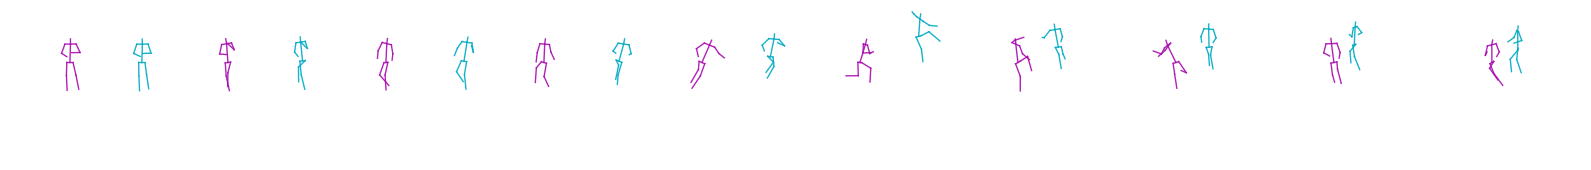

In [278]:
seq_list = add_plot_kps(y_test_full.copy())
#seq_list = add_plot_kps(np.load("./data/handball_shot/valid.npy"))
seq_list = add_plot_kps(np.load("./data/handball_shot/ri_hbs_train.npy"))

print(seq_list.shape)

N_FRAMES = 10

gs = gridspec.GridSpec(1, N_FRAMES)

fig = plt.figure(figsize=plt.figaspect(.5))

axes = [fig.add_subplot(gs[i], projection='3d') for i in range(N_FRAMES)]

plt.tight_layout(pad=0)

print(seq_list.shape)

seq_list = seq_list - seq_list[:, 0:1, :, -2:-1]
    
for ax, i in zip(axes, np.arange(199)[::(199//(N_FRAMES-1))]):
    
    ax.view_init(-70, 90)
    
    data = seq_list[5].transpose(1, 0, 2, 3)

    mx, mn = np.max(data) / 3.0, np.min(data) / 1.5

    plot_ax(ax, data[i], mn, mx) 


                     

plt.gcf().set_size_inches([15.8, 1.5]) # 6.4, 4.8
plt.gcf().savefig("./data/imgs/example_sequence.png", dpi=300)

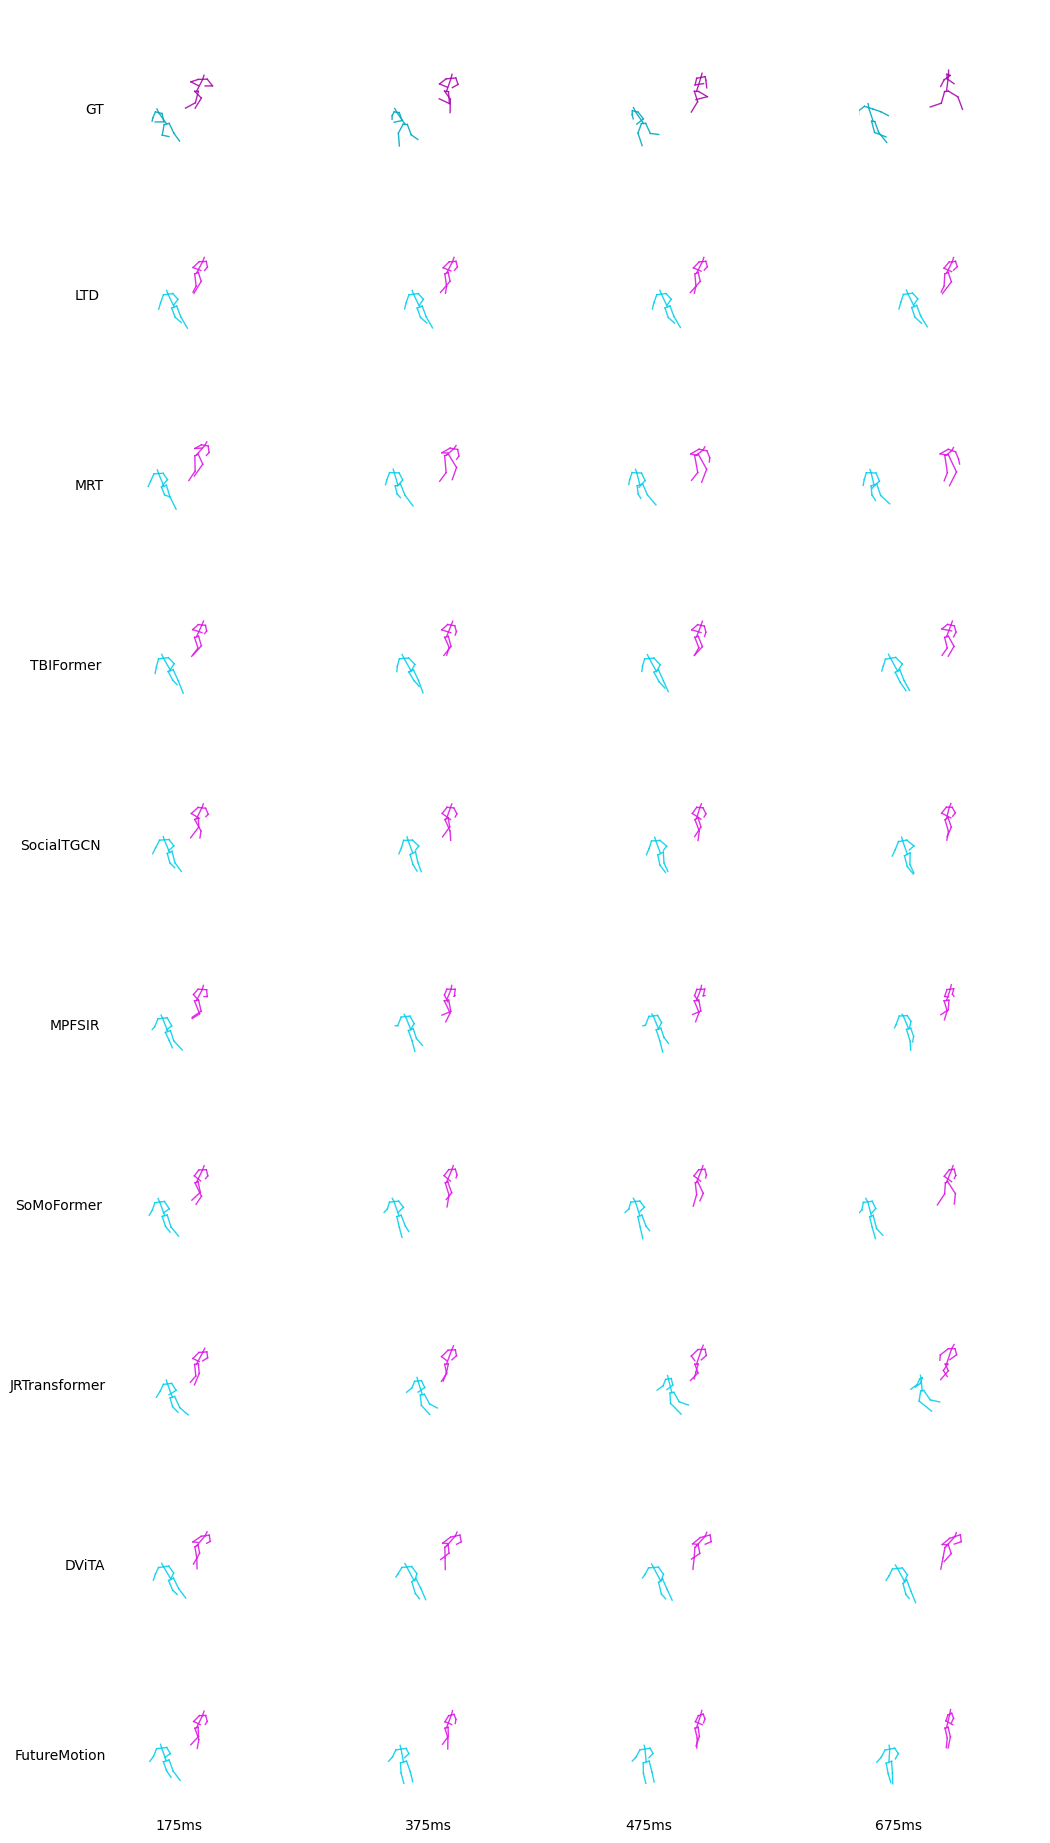

In [13]:
# Trained on 3DPW
d = {}
for name in ["handball_shot_"+f+".npy" for f in ["zero_velocity", "ltd", "dvita", "tbiformer", "mrt", "socialtgcn", "jrtransformer", "mpfsir", "future_motion_iccv21", "somoformer"]]:
    d[name.split(".npy")[0]] = np.load("./data/predictions/" + name).reshape(-1, 2, 14, 13, 3)
d_pt = d

input_window = 16
INDEXES = [3, 7, 9, 13] # 175ms 375ms 475ms 675ms

GT = add_plot_kps(y_test)
LTD = add_plot_kps(d_pt['handball_shot_ltd'])
MRT = add_plot_kps(d_pt['handball_shot_mrt'])
TBIFormer = add_plot_kps(d_pt['handball_shot_tbiformer'])
SocialTGCN = add_plot_kps(d_pt['handball_shot_socialtgcn'])
MPFSIR = add_plot_kps(d_pt['handball_shot_mpfsir'])
SoMoFormer = add_plot_kps(d_pt['handball_shot_somoformer'])
JRTransformer = add_plot_kps(d_pt['handball_shot_jrtransformer'])
DViTA = add_plot_kps(d_pt['handball_shot_dvita'])
FutureMotion = add_plot_kps(d_pt['handball_shot_future_motion_iccv21'])


gs = gridspec.GridSpec(11, 4)

fig = plt.figure(figsize=plt.figaspect(.5))

GT_ax = fig.add_subplot(gs[0], projection='3d'), fig.add_subplot(gs[1], projection='3d'), fig.add_subplot(gs[2], projection='3d'), fig.add_subplot(gs[3], projection='3d')
LTD_ax = fig.add_subplot(gs[4], projection='3d'), fig.add_subplot(gs[5], projection='3d'), fig.add_subplot(gs[6], projection='3d'), fig.add_subplot(gs[7], projection='3d')
MRT_ax = fig.add_subplot(gs[8], projection='3d'), fig.add_subplot(gs[9], projection='3d'), fig.add_subplot(gs[10], projection='3d'), fig.add_subplot(gs[11], projection='3d')
TBIFormer_ax = fig.add_subplot(gs[12], projection='3d'), fig.add_subplot(gs[13], projection='3d'), fig.add_subplot(gs[14], projection='3d'), fig.add_subplot(gs[15], projection='3d')
SocialTGCN_ax = fig.add_subplot(gs[16], projection='3d'), fig.add_subplot(gs[17], projection='3d'), fig.add_subplot(gs[18], projection='3d'), fig.add_subplot(gs[19], projection='3d')
MPFSIR_ax = fig.add_subplot(gs[20], projection='3d'), fig.add_subplot(gs[21], projection='3d'), fig.add_subplot(gs[22], projection='3d'), fig.add_subplot(gs[23], projection='3d')
SoMoFormer_ax = fig.add_subplot(gs[24], projection='3d'), fig.add_subplot(gs[25], projection='3d'), fig.add_subplot(gs[26], projection='3d'), fig.add_subplot(gs[27], projection='3d')
JRTransformer_ax = fig.add_subplot(gs[28], projection='3d'), fig.add_subplot(gs[29], projection='3d'), fig.add_subplot(gs[30], projection='3d'), fig.add_subplot(gs[31], projection='3d')

DViTA_ax = fig.add_subplot(gs[32], projection='3d'), fig.add_subplot(gs[33], projection='3d'), fig.add_subplot(gs[34], projection='3d'), fig.add_subplot(gs[35], projection='3d')
FutureMotion_ax = fig.add_subplot(gs[36], projection='3d'), fig.add_subplot(gs[37], projection='3d'), fig.add_subplot(gs[38], projection='3d'), fig.add_subplot(gs[39], projection='3d')

plt.tight_layout(pad=0)

for seq_i in [10]: # 6, 10

    mx, mn = np.max(GT[seq_i, :, :input_window]) / 1.5, np.min(GT[seq_i, :, :input_window]) / 1.5
    

    for i_ax, i in enumerate(INDEXES):
        plot_ax(GT_ax[i_ax], GT[seq_i].transpose(1, 0, 2, 3).copy()[i], mn, mx, True)
        plot_ax(LTD_ax[i_ax], LTD[seq_i].transpose(1, 0, 2, 3).copy()[i], mn, mx, False)
        plot_ax(MRT_ax[i_ax], MRT[seq_i].transpose(1, 0, 2, 3).copy()[i], mn, mx, False)
        plot_ax(TBIFormer_ax[i_ax], TBIFormer[seq_i].transpose(1, 0, 2, 3).copy()[i], mn, mx, False)
        plot_ax(SocialTGCN_ax[i_ax], SocialTGCN[seq_i].transpose(1, 0, 2, 3).copy()[i], mn, mx, False)
        plot_ax(MPFSIR_ax[i_ax], MPFSIR[seq_i].transpose(1, 0, 2, 3).copy()[i], mn, mx, False)
        plot_ax(SoMoFormer_ax[i_ax], SoMoFormer[seq_i].transpose(1, 0, 2, 3).copy()[i], mn, mx, False)
        plot_ax(JRTransformer_ax[i_ax], JRTransformer[seq_i].transpose(1, 0, 2, 3).copy()[i], mn, mx, False)
        plot_ax(DViTA_ax[i_ax], DViTA[seq_i].transpose(1, 0, 2, 3).copy()[i], mn, mx, False)
        plot_ax(FutureMotion_ax[i_ax], FutureMotion[seq_i].transpose(1, 0, 2, 3).copy()[i], mn, mx, False)

    fontsize = 10
    plt.gcf().text(0.01, 0.948, "GT", fontsize=fontsize)
    plt.gcf().text(0.0, 0.855, "LTD", fontsize=fontsize)
    plt.gcf().text(0.00, 0.76, "MRT", fontsize=fontsize)
    plt.gcf().text(-0.045, 0.670, "TBIFormer", fontsize=fontsize)
    plt.gcf().text(-0.055, 0.58, "SocialTGCN", fontsize=fontsize)
    plt.gcf().text(-0.025, 0.49, "MPFSIR", fontsize=fontsize)
    plt.gcf().text(-0.06, 0.4, "SoMoFormer", fontsize=fontsize)
    plt.gcf().text(-0.065, 0.31, "JRTransformer", fontsize=fontsize)
    plt.gcf().text(-0.01, 0.22, "DViTA", fontsize=fontsize)
    plt.gcf().text(-0.06, 0.125, "FutureMotion", fontsize=fontsize)
   
    plt.gcf().text(0.08, 0.09, "175ms", fontsize=fontsize)
    plt.gcf().text(0.33, 0.09, "375ms", fontsize=fontsize)
    plt.gcf().text(0.55, 0.09, "475ms", fontsize=fontsize)
    plt.gcf().text(0.80, 0.09, "675ms", fontsize=fontsize)


    plt.gcf().set_size_inches([5*2, 10*2])
    plt.gcf().savefig("./data/imgs/pretrained_predictions.png", dpi=300, bbox_inches='tight')

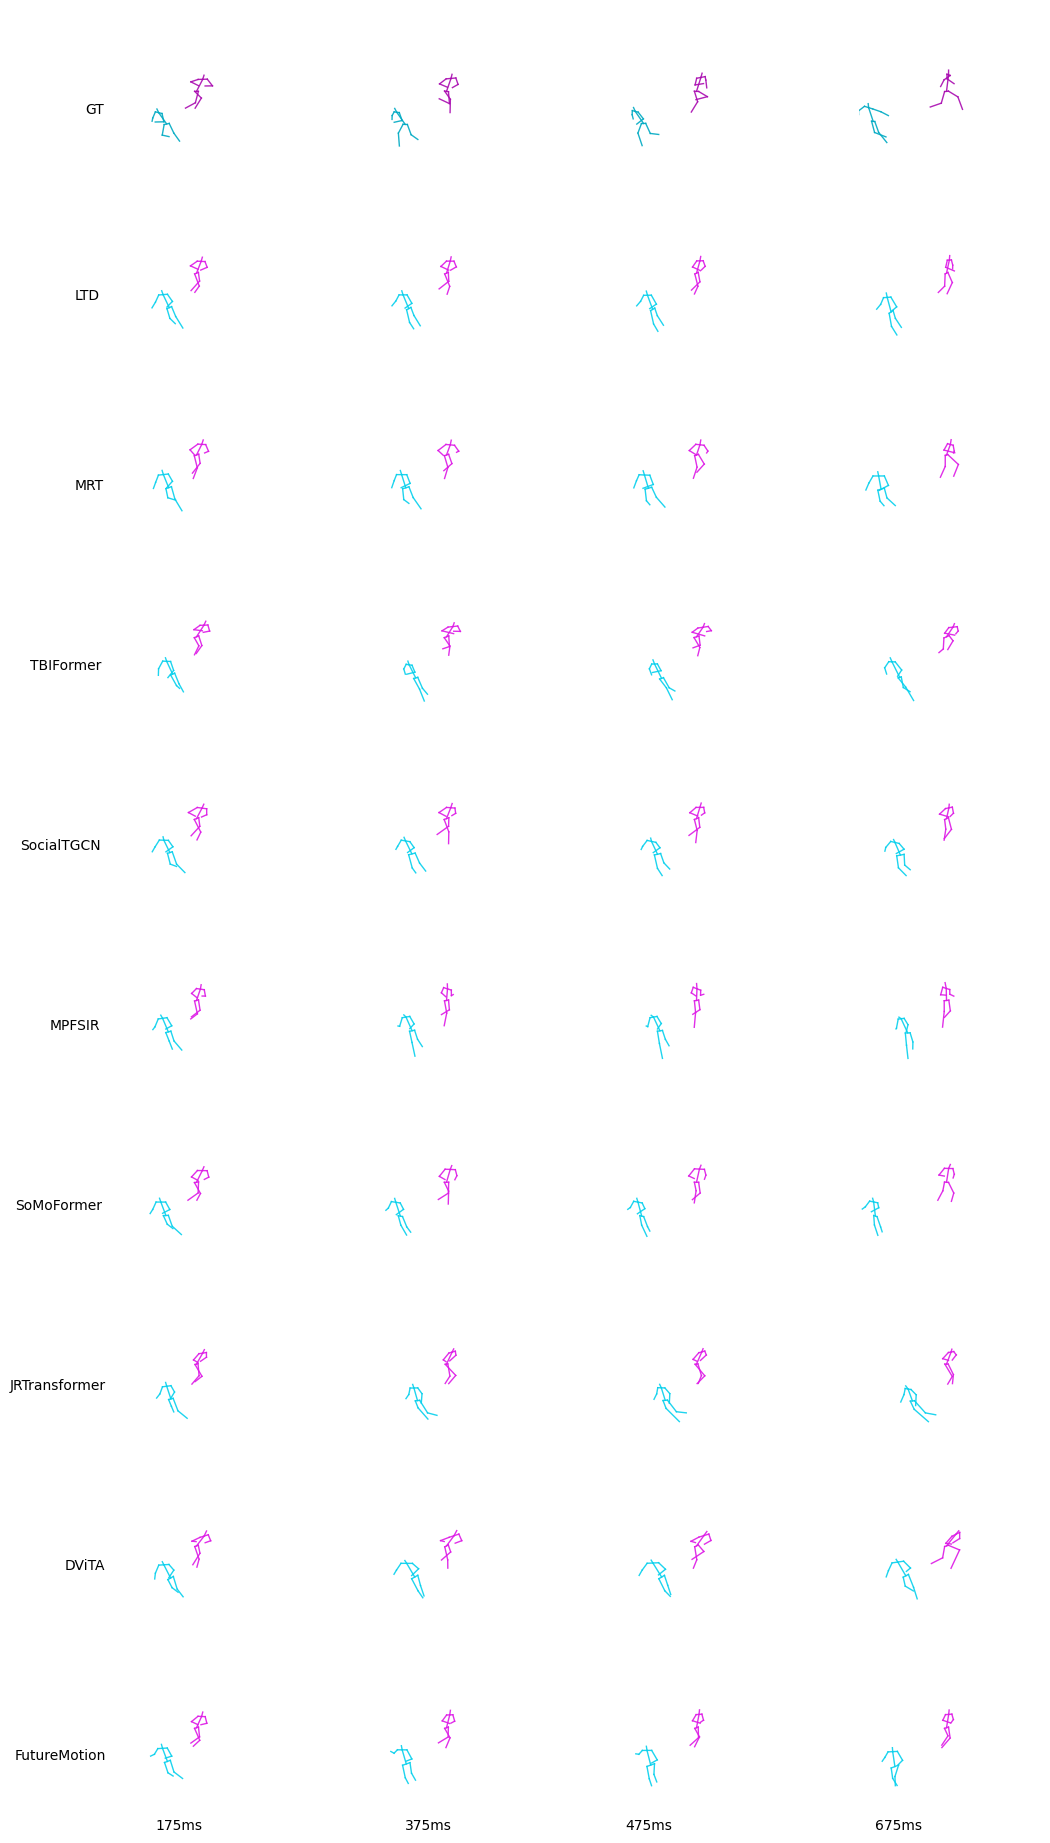

In [12]:
# Trained on 3DPW
d = {}
for name in ["handball_shot_"+f+".npy" for f in ["zero_velocity", "ltd", "dvita", "tbiformer", "mrt", "socialtgcn", "jrtransformer", "mpfsir", "future_motion_iccv21", "somoformer"]]:
    d[name.split(".npy")[0]] = np.load("./data/predictions_finetune/" + name).reshape(-1, 2, 14, 13, 3)

input_window = 16
INDEXES = [3, 7, 9, 13] # 175ms 375ms 475ms 675ms

GT = add_plot_kps(y_test)
LTD = add_plot_kps(d['handball_shot_ltd'])
MRT = add_plot_kps(d['handball_shot_mrt'])
TBIFormer = add_plot_kps(d['handball_shot_tbiformer'])
SocialTGCN = add_plot_kps(d['handball_shot_socialtgcn'])
MPFSIR = add_plot_kps(d['handball_shot_mpfsir'])
SoMoFormer = add_plot_kps(d['handball_shot_somoformer'])
JRTransformer = add_plot_kps(d['handball_shot_jrtransformer'])
DViTA = add_plot_kps(d['handball_shot_dvita'])
FutureMotion = add_plot_kps(d['handball_shot_future_motion_iccv21'])


gs = gridspec.GridSpec(11, 4)

fig = plt.figure(figsize=plt.figaspect(.5))

GT_ax = fig.add_subplot(gs[0], projection='3d'), fig.add_subplot(gs[1], projection='3d'), fig.add_subplot(gs[2], projection='3d'), fig.add_subplot(gs[3], projection='3d')
LTD_ax = fig.add_subplot(gs[4], projection='3d'), fig.add_subplot(gs[5], projection='3d'), fig.add_subplot(gs[6], projection='3d'), fig.add_subplot(gs[7], projection='3d')
MRT_ax = fig.add_subplot(gs[8], projection='3d'), fig.add_subplot(gs[9], projection='3d'), fig.add_subplot(gs[10], projection='3d'), fig.add_subplot(gs[11], projection='3d')
TBIFormer_ax = fig.add_subplot(gs[12], projection='3d'), fig.add_subplot(gs[13], projection='3d'), fig.add_subplot(gs[14], projection='3d'), fig.add_subplot(gs[15], projection='3d')
SocialTGCN_ax = fig.add_subplot(gs[16], projection='3d'), fig.add_subplot(gs[17], projection='3d'), fig.add_subplot(gs[18], projection='3d'), fig.add_subplot(gs[19], projection='3d')
MPFSIR_ax = fig.add_subplot(gs[20], projection='3d'), fig.add_subplot(gs[21], projection='3d'), fig.add_subplot(gs[22], projection='3d'), fig.add_subplot(gs[23], projection='3d')
SoMoFormer_ax = fig.add_subplot(gs[24], projection='3d'), fig.add_subplot(gs[25], projection='3d'), fig.add_subplot(gs[26], projection='3d'), fig.add_subplot(gs[27], projection='3d')
JRTransformer_ax = fig.add_subplot(gs[28], projection='3d'), fig.add_subplot(gs[29], projection='3d'), fig.add_subplot(gs[30], projection='3d'), fig.add_subplot(gs[31], projection='3d')

DViTA_ax = fig.add_subplot(gs[32], projection='3d'), fig.add_subplot(gs[33], projection='3d'), fig.add_subplot(gs[34], projection='3d'), fig.add_subplot(gs[35], projection='3d')
FutureMotion_ax = fig.add_subplot(gs[36], projection='3d'), fig.add_subplot(gs[37], projection='3d'), fig.add_subplot(gs[38], projection='3d'), fig.add_subplot(gs[39], projection='3d')

plt.tight_layout(pad=0)

for seq_i in [10]: # 6, 10

    mx, mn = np.max(GT[seq_i, :, :input_window]) / 1.5, np.min(GT[seq_i, :, :input_window]) / 1.5
    

    for i_ax, i in enumerate(INDEXES):
        plot_ax(GT_ax[i_ax], GT[seq_i].transpose(1, 0, 2, 3).copy()[i], mn, mx, True)
        plot_ax(LTD_ax[i_ax], LTD[seq_i].transpose(1, 0, 2, 3).copy()[i], mn, mx, False)
        plot_ax(MRT_ax[i_ax], MRT[seq_i].transpose(1, 0, 2, 3).copy()[i], mn, mx, False)
        plot_ax(TBIFormer_ax[i_ax], TBIFormer[seq_i].transpose(1, 0, 2, 3).copy()[i], mn, mx, False)
        plot_ax(SocialTGCN_ax[i_ax], SocialTGCN[seq_i].transpose(1, 0, 2, 3).copy()[i], mn, mx, False)
        plot_ax(MPFSIR_ax[i_ax], MPFSIR[seq_i].transpose(1, 0, 2, 3).copy()[i], mn, mx, False)
        plot_ax(SoMoFormer_ax[i_ax], SoMoFormer[seq_i].transpose(1, 0, 2, 3).copy()[i], mn, mx, False)
        plot_ax(JRTransformer_ax[i_ax], JRTransformer[seq_i].transpose(1, 0, 2, 3).copy()[i], mn, mx, False)
        plot_ax(DViTA_ax[i_ax], DViTA[seq_i].transpose(1, 0, 2, 3).copy()[i], mn, mx, False)
        plot_ax(FutureMotion_ax[i_ax], FutureMotion[seq_i].transpose(1, 0, 2, 3).copy()[i], mn, mx, False)

    fontsize = 10
    plt.gcf().text(0.01, 0.948, "GT", fontsize=fontsize)
    plt.gcf().text(0.0, 0.855, "LTD", fontsize=fontsize)
    plt.gcf().text(0.00, 0.76, "MRT", fontsize=fontsize)
    plt.gcf().text(-0.045, 0.670, "TBIFormer", fontsize=fontsize)
    plt.gcf().text(-0.055, 0.58, "SocialTGCN", fontsize=fontsize)
    plt.gcf().text(-0.025, 0.49, "MPFSIR", fontsize=fontsize)
    plt.gcf().text(-0.06, 0.4, "SoMoFormer", fontsize=fontsize)
    plt.gcf().text(-0.065, 0.31, "JRTransformer", fontsize=fontsize)
    plt.gcf().text(-0.01, 0.22, "DViTA", fontsize=fontsize)
    plt.gcf().text(-0.06, 0.125, "FutureMotion", fontsize=fontsize)
   
    plt.gcf().text(0.08, 0.09, "175ms", fontsize=fontsize)
    plt.gcf().text(0.33, 0.09, "375ms", fontsize=fontsize)
    plt.gcf().text(0.55, 0.09, "475ms", fontsize=fontsize)
    plt.gcf().text(0.80, 0.09, "675ms", fontsize=fontsize)

    plt.gcf().set_size_inches([5*2, 10*2])
    plt.gcf().savefig("./data/imgs/finetuned_predictions.png", dpi=300, bbox_inches='tight')